# Tugas 4 : meringkas tugas

In [41]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def read_data(file_path):
    return pd.read_csv(file_path, sep=',', encoding='utf-8')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## import data

In [42]:
data = pd.read_csv('data_tugas1.csv')
data.head()

,Judul Berita,Isi Berita,Tanggal Berita,Kategori Berita
0,Terkini Bisnis: Prabowo Tidak Panggil 6 Menter...,Sebanyak enam orang menteri ekonomi di era kep...,15-10-2024 12:10,Bisnis
1,Klasemen Grup C Kualifikasi Piala Dunia 2026 s...,Timnas Indonesia tertahan di posisi kelima kl...,15-10-2024 23:10,Bola
2,"Profil Herindra, Calon Kepala BIN yang Bakal G...",Presiden Jokowi memberhentikan Budi Gunawan se...,15-10-2024 08:10,Nasional
3,Prediksi Arab Saudi vs Bahrain di Kualifikasi ...,Timnas Arab Saudi akan menjamu Bahrain pada la...,15-10-2024 08:10,Bola
4,Mengenal Pakta Integritas yang Akan Diteken Ca...,Dasco menjelaskan pakta integritas itu ditanda...,15-10-2024 16:10,Nasional


## Preprocessing Text

In [43]:
# Fungsi untuk membersihkan teks
def clean_text(text):
    text = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+))', ' ', text)  # Menghapus URL
    text = re.sub(r'@[^\s]+', ' ', text)  # Menghapus username (mention)
    text = re.sub(r'[\s]+', ' ', text)  # Menghapus tambahan spasi
    text = re.sub(r'#([^\s]+)', ' ', text)  # Menghapus hashtags
    text = re.sub(r"[^a-zA-Z :\.]", "", text)  # Menghapus tanda baca yang tidak diperlukan
    text = re.sub(r'\d', ' ', text)  # Menghapus angka
    text = text.lower()  # Mengubah teks menjadi huruf kecil
    text = text.encode('ascii', 'ignore').decode('utf-8')  # Menghapus karakter ASCII dan unicode
    text = re.sub(r'[^\x00-\x7f]', r'', text)  # Menghapus karakter non-ASCII
    text = text.replace('\n', '')  # Menghapus baris baru
    text = text.strip()  # Menghapus spasi di awal dan akhir teks
    return text

# Fungsi untuk menghapus stopwords
def clean_stopword(tokens):
    listStopword = set(stopwords.words('indonesian'))  # Mengambil daftar stopwords dalam Bahasa Indonesia
    filtered_words = [word for word in tokens if word.lower() not in listStopword]  # Menghapus stopwords dari tokens
    return filtered_words

# Fungsi untuk memproses teks
def preprocess_text(content):
    result = {}
    for i, text in enumerate(tqdm(content)):  # Menggunakan tqdm untuk menampilkan progress
        cleaned_text = clean_text(text)  # Membersihkan teks
        tokens = word_tokenize(cleaned_text)  # Tokenisasi teks menjadi kata-kata
        cleaned_stopword = clean_stopword(tokens)  # Menghapus stopwords
        result[i] = ' '.join(cleaned_stopword)  # Menggabungkan kata-kata yang sudah dibersihkan menjadi satu string
    return result

# Memproses data teks pada kolom 'Isi Berita'
prep_result = preprocess_text(data['Isi Berita'])

# Menampilkan hasil preproses
for key, value in prep_result.items():
    print(f"{key}: {value}")


100%|██████████| 30/30 [00:00<00:00, 1532.48it/s]

0: enam orang menteri ekonomi era kepemimpinan presiden jokowi dipanggil presiden terpilih prabowo subianto .
1: timnas indonesia tertahan posisi klaseme grup c putaran ketiga kualifikasi piala dunia zona asia takluk cina .
2: presiden jokowi memberhentikan budi gunawan kepala bin mengajukan herindra calon penggantinya . profil herindra .
3: timnas arab saudi menjamu bahrain laga keempat putaran ketiga kualifikasi piala dunia zona asia . bahrain diprediksi kalah
4: dasco pakta integritas ditandatangani calon menteri membantu kerja kabinet prabowo
5: bertemu prabowo giring mengaku berdiskusi fadli zon .
6: enam menteri ekonomi era jokowi dipanggil prabowo calon menteri pemerintahan .
7: sederet menteri jokowi dipanggil presiden terpilih prabowo subianto kediamannya kertanegara jakarta kemarin profil .
8: jerman bersikeras menghentikan penjualan senjata pemimpinya memblokir ekspor .
9: dewan keamanan pbb mendukung unifil operasi stabilitas regional .
10: pandangan internal pdip sikap pem

In [44]:
print(prep_result[29])

dudung abdurachman masuk daftar orang calon wakil menteri kepala badan diundang prabowo .


In [45]:
# Fungsi untuk menghitung TF-IDF
def compute_tfidf(preprocessed_text):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_text)
    terms = tfidf_vectorizer.get_feature_names_out()
    tfidf_df = pd.DataFrame(data=tfidf_matrix.toarray(), columns=terms)
    return tfidf_df

In [46]:
# Memproses data teks pada kolom 'Isi Berita'
prep_result = preprocess_text(data['Isi Berita'])

# Mengubah hasil preproses ke dalam DataFrame
kalimat_preprocessing = pd.DataFrame.from_dict(prep_result, orient='index', columns=['Isi Berita'])

# Menghitung TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_preprocessing = tfidf_vectorizer.fit_transform(kalimat_preprocessing['Isi Berita'])

# Mendapatkan istilah dari fitur
terms = tfidf_vectorizer.get_feature_names_out()

# Mengubah hasil TF-IDF menjadi DataFrame
tfidf_preprocessing_df = pd.DataFrame(data=tfidf_preprocessing.toarray(), columns=terms)

# Menampilkan hasil TF-IDF
tfidf_preprocessing_df

100%|██████████| 30/30 [00:00<00:00, 1095.57it/s]


,abdul,abdurachman,adrianto,agenda,ahmad,al,ambang,anung,aplikasi,arab,...,terpilih,tertahan,thom,timnas,udara,unifil,wakil,yassierli,zon,zona
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.288725,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.288975,0.000000,0.218193,0.00000,0.000000,0.000000,0.000000,0.000000,0.257653
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.245089,...,0.000000,0.000000,0.000000,0.185056,0.00000,0.000000,0.000000,0.000000,0.000000,0.218524
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.416195,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.297946,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.358173,0.000000,0.000000,0.000000,0.000000


Impor Library:

Library yang diperlukan diimpor, termasuk TfidfVectorizer dari sklearn untuk menghitung nilai TF-IDF.
Membaca Data:

Data diambil dari file CSV dan dibaca menggunakan pd.read_csv.
Fungsi untuk Membersihkan dan Memproses Teks:

Sama seperti sebelumnya, fungsi clean_text, clean_stopword, dan preprocess_text digunakan untuk membersihkan teks dan menghapus stopwords.
Menghitung TF-IDF:

Menggunakan TfidfVectorizer untuk menghitung nilai TF-IDF dari kalimat yang sudah diproses.
Hasilnya disimpan dalam variabel tfidf_preprocessing.
Mengubah Hasil TF-IDF menjadi DataFrame:

Data hasil TF-IDF diubah menjadi DataFrame menggunakan pd.DataFrame dengan istilah sebagai kolom.
Menampilkan Hasil:

Hasil TF-IDF ditampilkan.

## Cosine Similarity

In [47]:
import pandas as pd

# Fungsi untuk menampilkan similarity matrix
def display_similarity_matrix(similarity_matrix):
    print("Cosine Similarity Matrix:")
    print(similarity_matrix)

# Main execution
if __name__ == "__main__":
    # Membaca data
    data = read_data('data_tugas1.csv')

    # Memproses data teks pada kolom 'Isi Berita'
    prep_result = preprocess_text(data['Isi Berita'])

    # Mengubah hasil preproses ke dalam DataFrame
    kalimat_preprocessing = pd.DataFrame.from_dict(prep_result, orient='index', columns=['Isi Berita'])

    # Menghitung TF-IDF
    tfidf_preprocessing_df = compute_tfidf(kalimat_preprocessing['Isi Berita'])

    # Menghitung cosine similarity
    similarity_matrix = tfidf_preprocessing_df.dot(tfidf_preprocessing_df.T)


100%|██████████| 30/30 [00:00<00:00, 1527.89it/s]


Fungsi display_similarity_matrix(similarity_matrix):

Fungsi ini menerima parameter similarity_matrix (DataFrame yang berisi matriks kesamaan) dan mencetaknya ke layar.
Penggunaan Fungsi dalam Main execution:

Setelah menghitung similarity_matrix, fungsi display_similarity_matrix() dipanggil untuk menampilkan hasilnya.

In [48]:
similarity_matrix

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.000000,0.000000,0.160839,0.000000,0.051327,0.024679,0.540418,0.450181,0.0,0.000000,...,0.000000,0.000000,0.000000,0.225895,0.0,0.000000,0.047980,0.062528,0.046995,0.139289
1,0.000000,1.000000,0.000000,0.399990,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.333796,0.147095,0.000000,0.000000,0.0,0.059878,0.000000,0.000000,0.000000,0.000000
2,0.160839,0.000000,1.000000,0.000000,0.036749,0.000000,0.096619,0.165976,0.0,0.000000,...,0.000000,0.000000,0.000000,0.056277,0.0,0.000000,0.123485,0.000000,0.062468,0.091207
3,0.000000,0.399990,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.184079,0.037481,0.000000,0.000000,0.0,0.050785,0.000000,0.000000,0.000000,0.000000
4,0.051327,0.000000,0.036749,0.000000,1.000000,0.027914,0.163940,0.052966,0.0,0.000000,...,0.000000,0.000000,0.000000,0.182058,0.0,0.000000,0.143941,0.070724,0.053156,0.101412
5,0.024679,0.000000,0.000000,0.000000,0.027914,1.000000,0.032803,0.025467,0.0,0.000000,...,0.000000,0.000000,0.000000,0.034547,0.0,0.000000,0.026094,0.034006,0.025558,0.026701
6,0.540418,0.000000,0.096619,0.000000,0.163940,0.032803,1.000000,0.233529,0.0,0.000000,...,0.000000,0.000000,0.000000,0.478466,0.0,0.000000,0.205937,0.131052,0.098498,0.156816
7,0.450181,0.000000,0.165976,0.000000,0.052966,0.025467,0.233529,1.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.132564,0.0,0.000000,0.049512,0.064525,0.122880,0.050665
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


## Graph

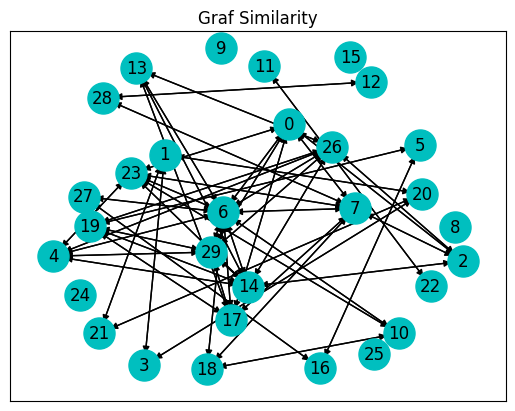

In [49]:
# Fungsi untuk menggambar graf berdasarkan similarity matrix
def draw_similarity_graph(similarity_matrix):
    graph = nx.DiGraph()  # Membuat directed graph

    # Menambahkan node ke graf
    for i in range(len(similarity_matrix)):
        graph.add_node(i)

    # Menambahkan edge berdasarkan similarity matrix
    for i in range(len(similarity_matrix)):
        for j in range(len(similarity_matrix)):
            similarity_value = similarity_matrix.iloc[i, j]
            if similarity_value > 0.1 and i != j:  # Threshold untuk menambahkan edge
                graph.add_edge(i, j)

    # Menggambar graf
    pos = nx.spring_layout(graph, k=2)  # Posisi node
    nx.draw_networkx_nodes(graph, pos, node_size=500, node_color='c')
    nx.draw_networkx_edges(graph, pos, edge_color='black', arrows=True)
    nx.draw_networkx_labels(graph, pos)

    plt.title("Graf Similarity")
    plt.show()  # Menampilkan graf

# Contoh pemanggilan fungsi
if __name__ == "__main__":
    # Setelah menghitung similarity_matrix
    draw_similarity_graph(similarity_matrix)  # Panggil fungsi untuk menggambar graf


## Matrix Centralitas

*   Matriks Sentralitas adalah matriks yang digunakan untuk merepresentasikan ukuran sentralitas dari setiap node dalam jaringan.



### Closeness Centrality

In [50]:
# Menghitung Cosine Centrality dari matriks kesamaan
cosine_centrality = {}

# Menghitung Cosine Centrality untuk setiap node
for i in range(len(similarity_matrix)):
    cosine_centrality[i] = sum(similarity_matrix.iloc[i]) / (len(similarity_matrix) - 1)  # menghitung nilai rata-rata sebagai contoh

# Mengurutkan berdasarkan nilai Cosine Centrality
sorted_cosine_centrality = sorted(cosine_centrality.items(), key=lambda x: x[1], reverse=True)

print("Cosine Centrality:")
for node, cosine in sorted_cosine_centrality:
    print(f"Node {node}: {cosine:.4f}")


Cosine Centrality:
Node 6: 0.1418
Node 14: 0.1241
Node 26: 0.1199
Node 0: 0.1102
Node 23: 0.1039
Node 29: 0.1006
Node 7: 0.1000
Node 4: 0.0826
Node 17: 0.0782
Node 27: 0.0744
Node 19: 0.0729
Node 2: 0.0702
Node 13: 0.0688
Node 28: 0.0681
Node 1: 0.0669
Node 10: 0.0644
Node 16: 0.0635
Node 18: 0.0630
Node 20: 0.0599
Node 3: 0.0577
Node 5: 0.0568
Node 11: 0.0516
Node 21: 0.0462
Node 22: 0.0412
Node 25: 0.0405
Node 12: 0.0383
Node 9: 0.0374
Node 24: 0.0345
Node 15: 0.0345
Node 8: 0.0345


In [51]:
# Fungsi untuk menghitung PageRank dan menampilkan ringkasan berdasarkan 3 nilai tertinggi
def summarize_pagerank(similarity_matrix, sentences):
    # Membuat graf directed graph berdasarkan similarity matrix
    graph = nx.DiGraph()
    for i in range(len(similarity_matrix)):
        graph.add_node(i)
    for i in range(len(similarity_matrix)):
        for j in range(len(similarity_matrix)):
            similarity_value = similarity_matrix.iloc[i, j]
            if similarity_value > 0.1 and i != j:
                graph.add_edge(i, j)

    # Menghitung PageRank
    pagerank_preprocessing = nx.pagerank(graph)

    # Mengurutkan PageRank dari nilai tertinggi ke terendah
    sorted_pagerank_preprocessing = sorted(pagerank_preprocessing.items(), key=lambda x: x[1], reverse=True)

    # Menampilkan tiga node tertinggi dan kalimat terkait
    ringkasan_pagerank_preprocessing = ""
    print("Tiga Node Tertinggi Page Rank Menggunakan Preprocessing:")
    for node, pagerank_value in sorted_pagerank_preprocessing[:3]:
        top_sentence = sentences[node]
        ringkasan_pagerank_preprocessing += top_sentence + " "
        print(f"Node {node}: Page Rank = {pagerank_value:.4f}")
        print(f"Kalimat: {top_sentence}\n")

    return ringkasan_pagerank_preprocessing

# Main execution
if __name__ == "__main__":
    # Misalkan similarity_matrix dan kalimat sudah tersedia
    ringkasan_pagerank = summarize_pagerank(similarity_matrix, kalimat_preprocessing['Isi Berita'])

    # Menampilkan ringkasan hasil PageRank
    print("Ringkasan Berdasarkan PageRank:")
    print(ringkasan_pagerank)


Tiga Node Tertinggi Page Rank Menggunakan Preprocessing:
Node 6: Page Rank = 0.0865
Kalimat: enam menteri ekonomi era jokowi dipanggil prabowo calon menteri pemerintahan .

Node 7: Page Rank = 0.0565
Kalimat: sederet menteri jokowi dipanggil presiden terpilih prabowo subianto kediamannya kertanegara jakarta kemarin profil .

Node 14: Page Rank = 0.0563
Kalimat: kedatangan pramono anung bersamaan agenda pemanggilan calon wakil menteri calon kepala badan kabinet prabowo .

Ringkasan Berdasarkan PageRank:
enam menteri ekonomi era jokowi dipanggil prabowo calon menteri pemerintahan . sederet menteri jokowi dipanggil presiden terpilih prabowo subianto kediamannya kertanegara jakarta kemarin profil . kedatangan pramono anung bersamaan agenda pemanggilan calon wakil menteri calon kepala badan kabinet prabowo . 
